## Python statistics essential training - 03_05_morevariables

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('gapminder.csv')

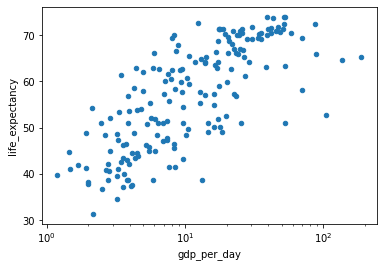

In [5]:
#let's look at ways to encode more than 2 variables into plots
def plotyear(year):
    data = gapminder[gapminder.year == year]
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)

plotyear(1965)

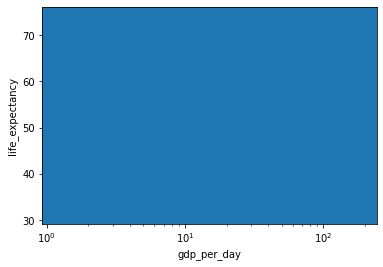

In [7]:
#we can't tell which country is which
#we can use size of the points as an additional dimension to encode population
def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = data.population
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,s=area) #s is shorthand for size

plotyear(1965)


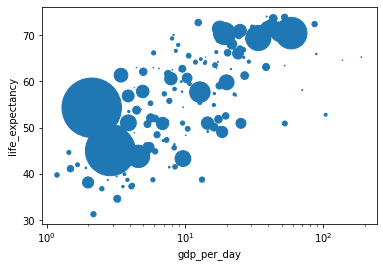

In [8]:
# the problem is numbers in populations are so big, therefore the area is so big
# we can scale down the area by factor of 5 million for example
def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population #changed
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,s=area) #s is shorthand for size

plotyear(1965)

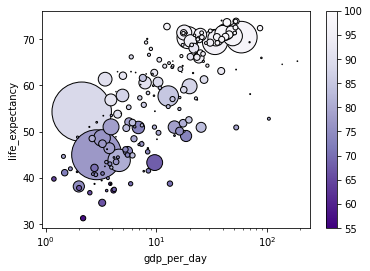

In [13]:
#we can add borders to make the plot more intelligible

def plotyear(year):
    # we can sort by population going down in size
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    
    # we can use color to encode child mortality
    color = data.age5_surviving
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,s=area,
                      #we can apply a colormap - reverse the scale so that dark is worst and fixate the colorscale range
                     c=color,colormap=matplotlib.cm.get_cmap('Purples_r'), 
                      vmin = 55, vmax=100, sharex=False,linewidths=1,edgecolors='k'
                     ) #s is shorthand for size

plotyear(1965)

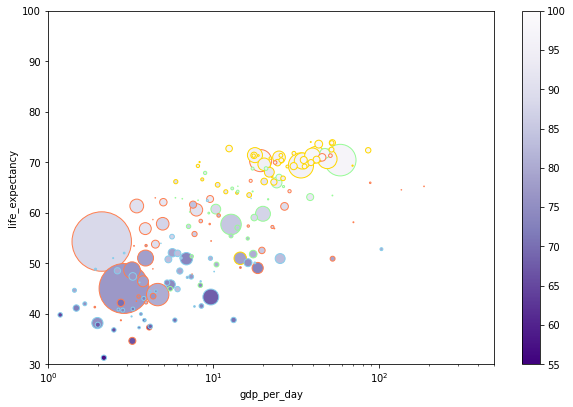

In [16]:
#at this point we are visualizing 4 variables in this plot

def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    #we can add color the borders of the dots to add 1 more variable
    # this time we can use a categorical variable - the region
    edgecolors = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,s=area,
                     c=color,colormap=matplotlib.cm.get_cmap('Purples_r'),
                      vmin = 55, vmax=100, sharex=False,linewidths=1,edgecolors=edgecolors #changed
                      ,figsize=(10,6.5)
                     )
    #set the axis ranges and make figure larger
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)

plotyear(1965)

In [18]:
#we can animate the plot, we can use a selector
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [20]:
#as we move through the years in the selector, the change in each country is evident
#total population in 2015
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [21]:
#total population by region
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

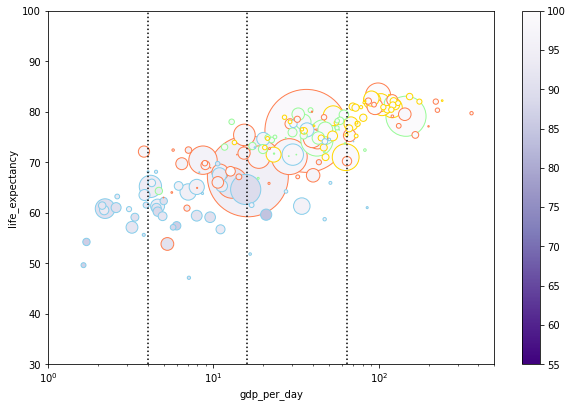

In [22]:
# we can plot the ranges using lines at which population was 
# considered poverty, above poverty, and normal (i.e. less than $4)

def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    #changed
    for level in [4,16,64]:
        pp.axvline(level,linestyle=':',color='k')
    
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)